In [5]:
import pandas as pd
import numpy as np
import os
import random
import pickle
from IPython.display import Image
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import klib
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from itertools import combinations
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
from tensorflow import keras
import keras.backend as K

import time
import sys
import gc
import pickle
import platform
from tqdm import tqdm
import shap

plt.rc('font',family='malgun gothic')
plt.rc('axes', unicode_minus=False)

print(tf.__version__)

2.4.0


# Data

In [6]:
info_competition = pd.read_csv('info_competition.csv',encoding='cp949').iloc[:,1:];info_competition

,cpt_id,is_official,period_start,period_end,name,name_eng,keyword,keyword_eng,participants,max_team_member,max_file_per_day,prize,prize_info,merge_deadline,winner_show
0,136,1,2018-08-14 0:00,2018-09-13 23:59,대출 상점 총 매출 예측 경진대회,Shop Total Sales Forecast,"금융 | 소상공인 신용카드 가맹점 빅데이터와 AI로 매출 예측 | 시계열, 회귀 ...",[Finance] Small Business Credit Card Merchant ...,303,5,5,850,"$8,500 + 100,000ZPR",2018-09-13 23:59,3
1,9565,1,2018-09-15 0:00,2018-10-13 23:59,병원 개/폐업 분류 예측 경진대회,hospital opening / closing classification pred...,금융 | 병원 재무 데이터와 AI로 개업|폐업 예측 분석 | 분류 | Accuracy,[Financial] Hospital financial data and openin...,448,10,3,350,"$3,500 + 40,000ZPR",2018-10-13 23:59,3
2,17801,1,2018-10-18 0:00,2018-12-31 23:59,아파트 경매가격 예측 경진대회,Apartment Auction Price Forecast,금융 | 부동산 아파트 경매 빅데이터와 AI로 경매가 예측 분석 | 회귀 | RMSE,[Finance] Real Estate Apartment Auction Big Da...,316,10,3,1000,"$10,000 + 120,000ZPR",2018-12-31 23:59,3
3,21265,1,2018-11-13 0:00,2019-01-31 23:59,아파트 실거래가 예측,apartment real price forecast,금융 | 부동산 빅데이터와 AI를 이용하여 실거래가를 예측 분석 | 회귀 | RMSE,[Finance] Predictive analysis of real transact...,568,10,3,800,"$8,000 + 80,000ZPR",2019-01-31 23:59,3
4,42473,1,2018-12-25 0:00,2019-01-10 23:59,신용카드 거래 데이터 시각화,credit card transaction data visualization,"금융 | 신용카드, 시계열, 시각화 | Python, R, Tableau, Spot...","[Finance] Credit cards, time series, visualiza...",252,5,3,100,"$1,000 + 100,000ZPR",2019-01-10 23:59,3
5,62540,1,2019-02-08 0:00,2019-07-18 23:59,KBO 타자 OPS 예측 경진대회,KBO batter OPS modeling,"스포츠 | KBO 타자 빅데이터와 AI로 OPS 예측 | 시계열, 회귀 | RMSE...",[Sports] KBO hitter big data and AI predict OP...,341,5,3,800,800만원,2019-07-18 23:59,3
6,68346,1,2019-03-26 0:00,2019-05-20 23:59,KBO 외국인 투수 스카우팅 최적화 경진대회,KBO foreign pitcher scouting optimization,"스포츠 | MLB 데이터와 AI를 이용 투수 스카우트 분석 | KBO, 회귀 | ...",[Sports] Pitcher Scout Analysis using MLB data...,98,1,3,200,200만원,2019-05-20 23:59,3
7,82407,1,2019-05-06 0:00,2019-07-08 23:59,KCB 금융스타일 시각화 경진대회,KCB Financial Style Visualization Contest,"금융 | 구인 | 개인 신용카드 빅데이터 AI 분석 시각화 | Python, R, ...",Finance | Job offer | Analysis visualization w...,269,5,3,1000,"1,000만원",2019-07-08 23:59,3
8,140472,1,2019-07-11 0:00,2019-10-21 23:59,상점 신용카드 매출 예측 경진대회,Store Credit Card Sales Forecast Contest,금융 | 구인 | 소상공인 가맹점 신용카드 빅데이터와 AI로 매출 예측 분석 | 시...,"[Finance, Job Offers] Small business merchant ...",624,5,100,200,200만원,2020-10-28 23:59,3
9,196878,1,2019-10-01 0:00,2019-10-27 23:59,전력 수요량 예측 경진대회,Electric Power Demand Forecast Contest,"공공 | 전력 기상 빅데이터와 AI로 수요량 분석 | 시계열, 회귀 | SMAPE",[Public] Analyzing demand by power weather big...,478,4,3,600,600만원,2019-10-27 23:59,3


In [7]:
info_competition.period_start = info_competition.period_start.apply(lambda x: x.replace(x[-2:],"00"))
info_competition.period_end = info_competition.period_end.apply(lambda x: x.replace(x[-2:],"00"))
info_competition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cpt_id            48 non-null     int64 
 1   is_official       48 non-null     int64 
 2   period_start      48 non-null     object
 3   period_end        48 non-null     object
 4   name              48 non-null     object
 5   name_eng          25 non-null     object
 6   keyword           48 non-null     object
 7   keyword_eng       24 non-null     object
 8   participants      48 non-null     int64 
 9   max_team_member   48 non-null     int64 
 10  max_file_per_day  48 non-null     int64 
 11  prize             48 non-null     int64 
 12  prize_info        32 non-null     object
 13  merge_deadline    48 non-null     object
 14  winner_show       48 non-null     int64 
dtypes: int64(7), object(8)
memory usage: 5.8+ KB


In [8]:
info_login = pd.read_csv('info_login.csv',encoding='cp949').iloc[:148999,1:];info_login

Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.


,login_id,user_id,c_time,platform,browser
0,14196.0,19195.0,2018-09-23 1:30,Windows 8,Internet Explorer 10.0
1,14234.0,22045.0,2018-09-23 2:46,Windows,Chrome 67.0.3396.99
2,14256.0,8790.0,2018-09-23 3:35,Windows,Chrome 69.0.3497.100
3,14278.0,NaN,2018-09-23 12:50,Windows,Chrome 69.0.3497.100
4,14279.0,NaN,2018-09-23 12:50,Windows,Chrome 69.0.3497.100
...,...,...,...,...,...
148994,584404.0,19696.0,2020-12-08 23:46,NaN,NaN
148995,584405.0,6586.0,2020-12-08 23:49,NaN,NaN
148996,584406.0,19303.0,2020-12-08 23:49,NaN,NaN
148997,584407.0,11103.0,2020-12-08 23:51,NaN,NaN


In [9]:
info_login.c_time = info_login.c_time.apply(lambda x: x.replace(x[-2:],"00"))
info_login

,login_id,user_id,c_time,platform,browser
0,14196.0,19195.0,2018-09-23 1:00,Windows 8,Internet Explorer 10.0
1,14234.0,22045.0,2018-09-23 2:00,Windows,Chrome 67.0.3396.99
2,14256.0,8790.0,2018-09-23 3:00,Windows,Chrome 69.0.3497.100
3,14278.0,NaN,2018-09-23 12:00,Windows,Chrome 69.0.3497.100
4,14279.0,NaN,2018-09-23 12:00,Windows,Chrome 69.0.3497.100
...,...,...,...,...,...
148994,584404.0,19696.0,2020-12-08 23:00,NaN,NaN
148995,584405.0,6586.0,2020-12-08 23:00,NaN,NaN
148996,584406.0,19303.0,2020-12-08 23:00,NaN,NaN
148997,584407.0,11103.0,2020-12-08 23:00,NaN,NaN


In [10]:
info_submission = pd.read_csv('info_submission.csv',encoding='cp949').iloc[:101587,1:];info_submission

,sub_id,cpt_id,team_id,user_id,c_time
0,-250918.0,229255.0,5019.0,15880.0,2019-11-24 20:40
1,-250904.0,229611.0,5162.0,19772.0,2019-11-24 20:36
2,-250881.0,235401.0,5042.0,17801.0,2019-11-24 20:24
3,-250873.0,235401.0,5024.0,439.0,2019-11-24 20:23
4,-250860.0,229255.0,4890.0,13722.0,2019-11-24 20:19
...,...,...,...,...,...
101582,483653.0,235658.0,44883.0,11628.0,2020-12-08 23:53
101583,483654.0,235671.0,45009.0,10592.0,2020-12-08 23:56
101584,483655.0,235671.0,45013.0,5987.0,2020-12-08 23:56
101585,483656.0,235658.0,42355.0,6586.0,2020-12-08 23:57


In [11]:
info_submission.c_time = info_submission.c_time.apply(lambda x: x.replace(x[-2:],"00"))
info_submission

,sub_id,cpt_id,team_id,user_id,c_time
0,-250918.0,229255.0,5019.0,15880.0,2019-11-24 20:00
1,-250904.0,229611.0,5162.0,19772.0,2019-11-24 20:00
2,-250881.0,235401.0,5042.0,17801.0,2019-11-00 20:00
3,-250873.0,235401.0,5024.0,439.0,2019-11-24 20:00
4,-250860.0,229255.0,4890.0,13722.0,2000-11-24 20:00
...,...,...,...,...,...
101582,483653.0,235658.0,44883.0,11628.0,2020-12-08 23:00
101583,483654.0,235671.0,45009.0,10592.0,2020-12-08 23:00
101584,483655.0,235671.0,45013.0,5987.0,2020-12-08 23:00
101585,483656.0,235658.0,42355.0,6586.0,2020-12-08 23:00


In [12]:
info_user = pd.read_csv('info_user.csv',encoding='cp949').iloc[:21692,1:];info_user

,id,c_time,entered_competition_cnt,code_share_cnt,talk_board_cnt,country_code,python_level,ds_level
0,15994.0,2017-05-02 23:58,94.0,306.0,477.0,82.0,1.0,1.0
1,19195.0,2018-08-08 18:21,1.0,0.0,0.0,82.0,1.0,1.0
2,16339.0,2018-08-08 19:57,1.0,0.0,0.0,82.0,1.0,1.0
3,7290.0,2018-08-08 19:59,0.0,0.0,0.0,82.0,1.0,1.0
4,21287.0,2018-08-08 20:26,0.0,0.0,0.0,82.0,1.0,1.0
...,...,...,...,...,...,...,...,...
21687,11584.0,2020-12-08 22:53,1.0,0.0,0.0,82.0,1.0,1.0
21688,6337.0,2020-12-08 22:54,1.0,0.0,0.0,82.0,1.0,1.0
21689,2505.0,2020-12-08 23:07,1.0,0.0,0.0,82.0,1.0,1.0
21690,14182.0,2020-12-08 23:09,1.0,0.0,0.0,82.0,1.0,1.0


In [13]:
info_user.c_time = info_user.c_time.apply(lambda x: x.replace(x[-2:],"00"))
info_user

,id,c_time,entered_competition_cnt,code_share_cnt,talk_board_cnt,country_code,python_level,ds_level
0,15994.0,2017-05-02 23:00,94.0,306.0,477.0,82.0,1.0,1.0
1,19195.0,2018-08-08 18:00,1.0,0.0,0.0,82.0,1.0,1.0
2,16339.0,2018-08-08 19:00,1.0,0.0,0.0,82.0,1.0,1.0
3,7290.0,2018-08-08 19:00,0.0,0.0,0.0,82.0,1.0,1.0
4,21287.0,2018-08-08 20:00,0.0,0.0,0.0,82.0,1.0,1.0
...,...,...,...,...,...,...,...,...
21687,11584.0,2020-12-08 22:00,1.0,0.0,0.0,82.0,1.0,1.0
21688,6337.0,2020-12-08 22:00,1.0,0.0,0.0,82.0,1.0,1.0
21689,2505.0,2020-12-08 23:00,1.0,0.0,0.0,82.0,1.0,1.0
21690,14182.0,2020-12-08 23:00,1.0,0.0,0.0,82.0,1.0,1.0


In [14]:
train = pd.read_csv('train.csv',encoding='cp949')
train['DateTime'] = pd.to_datetime(train['DateTime']);train

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2018-09-09 00:00:00,19,19,8,206
1,2018-09-09 01:00:00,20,19,9,259
2,2018-09-09 02:00:00,12,9,1,48
3,2018-09-09 03:00:00,10,10,2,102
4,2018-09-09 04:00:00,6,5,3,18
...,...,...,...,...,...
19003,2020-11-08 19:00:00,124,123,19,3128
19004,2020-11-08 20:00:00,166,159,29,4864
19005,2020-11-08 21:00:00,184,173,32,3426
19006,2020-11-08 22:00:00,163,155,34,2845


In [15]:
submission = pd.read_csv('submission.csv',encoding='cp949');submission

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2020-11-09,0,0,0,0
1,2020-11-10,0,0,0,0
2,2020-11-11,0,0,0,0
3,2020-11-12,0,0,0,0
4,2020-11-13,0,0,0,0
...,...,...,...,...,...
56,2021-01-04,0,0,0,0
57,2021-01-05,0,0,0,0
58,2021-01-06,0,0,0,0
59,2021-01-07,0,0,0,0


# 시각화 & 시계열

In [12]:
train['YearMonth'] = train['DateTime'].dt.to_period('M')
year_month = train.groupby('YearMonth').mean().reset_index()

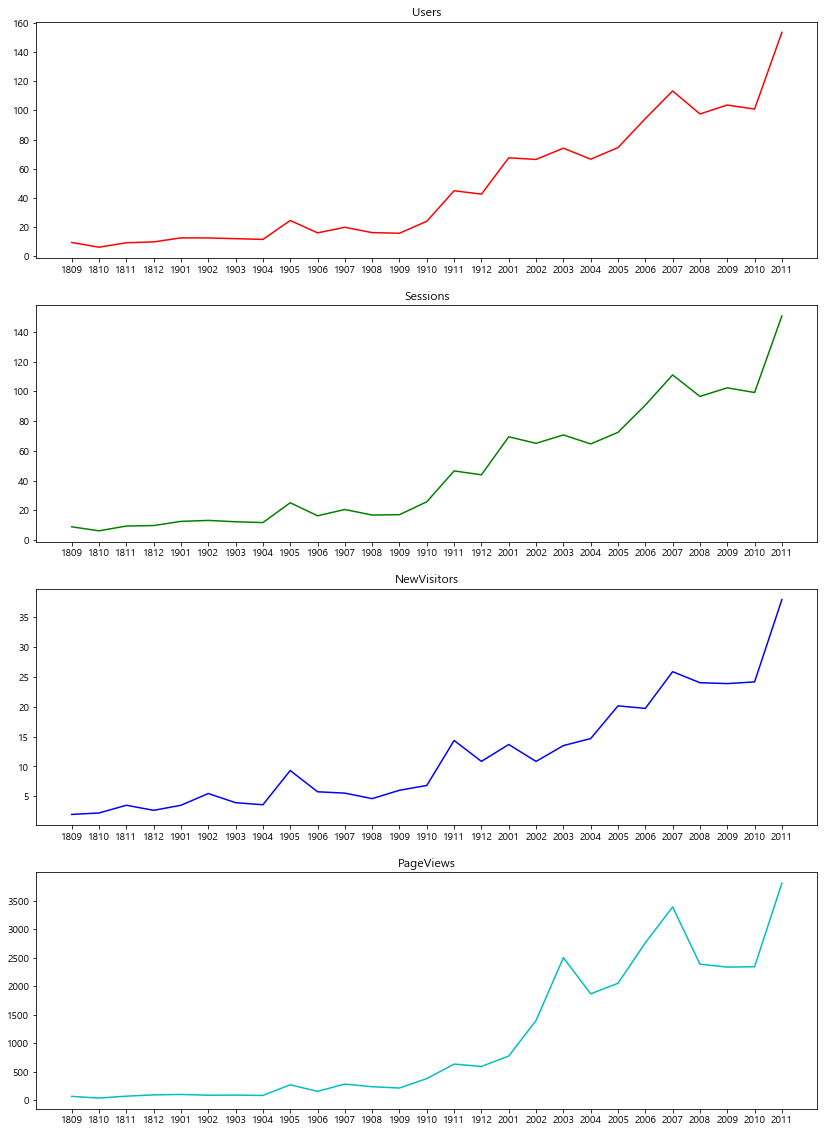

In [13]:
fig, axes = plt.subplots(4, 1, figsize=(14, 20))
axes[0].plot(year_month['YearMonth'].dt.strftime('%y%m'), year_month['사용자'], 'r')
axes[1].plot(year_month['YearMonth'].dt.strftime('%y%m'), year_month['세션'], 'g')
axes[2].plot(year_month['YearMonth'].dt.strftime('%y%m'), year_month['신규방문자'], 'b')
axes[3].plot(year_month['YearMonth'].dt.strftime('%y%m'), year_month['페이지뷰'], 'c')
for i, title in enumerate(['Users', 'Sessions', 'NewVisitors', 'PageViews']):
    axes[i].set_title(title)
plt.show()

In [14]:
train['Hour'] = train['DateTime'].dt.hour
hour = train.groupby('Hour').mean().reset_index()

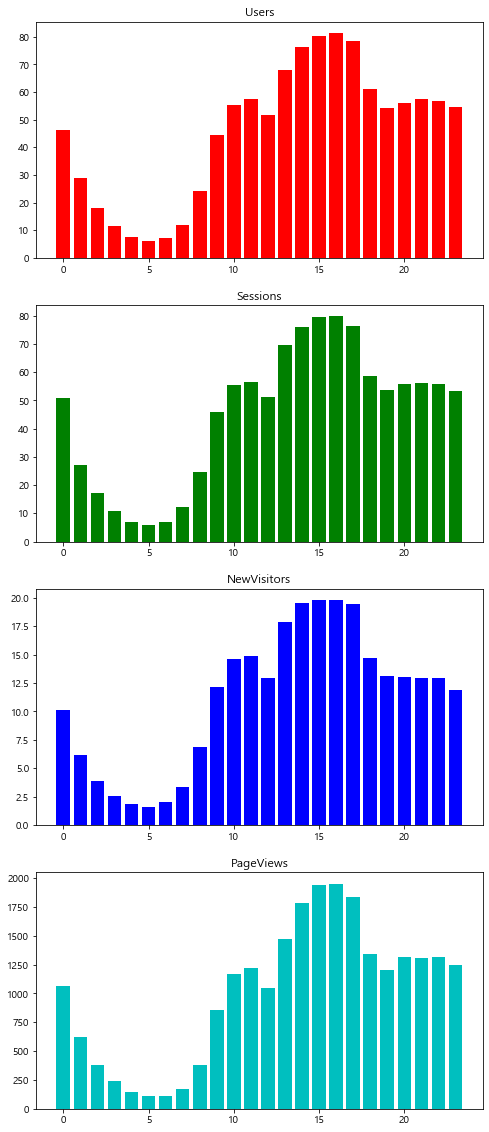

In [15]:
fig, axes = plt.subplots(4, 1, figsize=(8, 20))
axes[0].bar(hour['Hour'], hour['사용자'], color='r')
axes[1].bar(hour['Hour'], hour['세션'], color='g')
axes[2].bar(hour['Hour'], hour['신규방문자'], color='b')
axes[3].bar(hour['Hour'], hour['페이지뷰'], color='c')
for i, title in enumerate(['Users', 'Sessions', 'NewVisitors', 'PageViews']):
    axes[i].set_title(title)
plt.show()

# Make Feature

### original

In [16]:
train.DateTime = train.DateTime.astype(str).apply(lambda x: x[:-3]);train

,DateTime,사용자,세션,신규방문자,페이지뷰,YearMonth,Hour
0,2018-09-09 00:00,19,19,8,206,2018-09,0
1,2018-09-09 01:00,20,19,9,259,2018-09,1
2,2018-09-09 02:00,12,9,1,48,2018-09,2
3,2018-09-09 03:00,10,10,2,102,2018-09,3
4,2018-09-09 04:00,6,5,3,18,2018-09,4
...,...,...,...,...,...,...,...
19003,2020-11-08 19:00,124,123,19,3128,2020-11,19
19004,2020-11-08 20:00,166,159,29,4864,2020-11,20
19005,2020-11-08 21:00,184,173,32,3426,2020-11,21
19006,2020-11-08 22:00,163,155,34,2845,2020-11,22


In [17]:
feature = pd.DataFrame(train.DateTime);feature

,DateTime
0,2018-09-09 00:00
1,2018-09-09 01:00
2,2018-09-09 02:00
3,2018-09-09 03:00
4,2018-09-09 04:00
...,...
19003,2020-11-08 19:00
19004,2020-11-08 20:00
19005,2020-11-08 21:00
19006,2020-11-08 22:00


### info_login

In [18]:
info_login

,login_id,user_id,c_time,platform,browser
0,14196.0,19195.0,2018-09-23 1:00,Windows 8,Internet Explorer 10.0
1,14234.0,22045.0,2018-09-23 2:00,Windows,Chrome 67.0.3396.99
2,14256.0,8790.0,2018-09-23 3:00,Windows,Chrome 69.0.3497.100
3,14278.0,NaN,2018-09-23 12:00,Windows,Chrome 69.0.3497.100
4,14279.0,NaN,2018-09-23 12:00,Windows,Chrome 69.0.3497.100
...,...,...,...,...,...
148994,584404.0,19696.0,2020-12-08 23:00,NaN,NaN
148995,584405.0,6586.0,2020-12-08 23:00,NaN,NaN
148996,584406.0,19303.0,2020-12-08 23:00,NaN,NaN
148997,584407.0,11103.0,2020-12-08 23:00,NaN,NaN


In [19]:
### 날짜별 유저 수

f = info_login.groupby('c_time')['user_id'].count().reset_index()
f.columns = ['DateTime','user_count']
feature = pd.merge(feature,f,on='DateTime',how='left');feature

,DateTime,user_count
0,2018-09-09 00:00,NaN
1,2018-09-09 01:00,NaN
2,2018-09-09 02:00,NaN
3,2018-09-09 03:00,NaN
4,2018-09-09 04:00,NaN
...,...,...
19003,2020-11-08 19:00,10.0
19004,2020-11-08 20:00,16.0
19005,2020-11-08 21:00,14.0
19006,2020-11-08 22:00,12.0


In [20]:
### 날짜별 로그인 수

f = info_login.groupby('c_time')['login_id'].count().reset_index()
f.columns = ['DateTime','login_count']
feature = pd.merge(feature,f,on='DateTime',how='left');feature

,DateTime,user_count,login_count
0,2018-09-09 00:00,NaN,NaN
1,2018-09-09 01:00,NaN,NaN
2,2018-09-09 02:00,NaN,NaN
3,2018-09-09 03:00,NaN,NaN
4,2018-09-09 04:00,NaN,NaN
...,...,...,...
19003,2020-11-08 19:00,10.0,10.0
19004,2020-11-08 20:00,16.0,16.0
19005,2020-11-08 21:00,14.0,14.0
19006,2020-11-08 22:00,12.0,12.0


### info_submission

In [21]:
info_submission

,sub_id,cpt_id,team_id,user_id,c_time
0,-250918.0,229255.0,5019.0,15880.0,2019-11-24 20:00
1,-250904.0,229611.0,5162.0,19772.0,2019-11-24 20:00
2,-250881.0,235401.0,5042.0,17801.0,2019-11-00 20:00
3,-250873.0,235401.0,5024.0,439.0,2019-11-24 20:00
4,-250860.0,229255.0,4890.0,13722.0,2000-11-24 20:00
...,...,...,...,...,...
101582,483653.0,235658.0,44883.0,11628.0,2020-12-08 23:00
101583,483654.0,235671.0,45009.0,10592.0,2020-12-08 23:00
101584,483655.0,235671.0,45013.0,5987.0,2020-12-08 23:00
101585,483656.0,235658.0,42355.0,6586.0,2020-12-08 23:00


In [22]:
### 날짜별 제출 수

f = info_submission.groupby('c_time')['sub_id'].count().reset_index()
f.columns = ['DateTime','sub_count']
feature = pd.merge(feature,f,on='DateTime',how='left');feature

,DateTime,user_count,login_count,sub_count
0,2018-09-09 00:00,NaN,NaN,NaN
1,2018-09-09 01:00,NaN,NaN,NaN
2,2018-09-09 02:00,NaN,NaN,NaN
3,2018-09-09 03:00,NaN,NaN,NaN
4,2018-09-09 04:00,NaN,NaN,NaN
...,...,...,...,...
19003,2020-11-08 19:00,10.0,10.0,14.0
19004,2020-11-08 20:00,16.0,16.0,16.0
19005,2020-11-08 21:00,14.0,14.0,24.0
19006,2020-11-08 22:00,12.0,12.0,16.0


In [23]:
### 날짜별 제출 팀 수 - 비식별화?

f = info_submission.groupby('c_time')['team_id'].count().reset_index()
f.columns = ['DateTime','sub_team_count']
feature = pd.merge(feature,f,on='DateTime',how='left');feature

,DateTime,user_count,login_count,sub_count,sub_team_count
0,2018-09-09 00:00,NaN,NaN,NaN,NaN
1,2018-09-09 01:00,NaN,NaN,NaN,NaN
2,2018-09-09 02:00,NaN,NaN,NaN,NaN
3,2018-09-09 03:00,NaN,NaN,NaN,NaN
4,2018-09-09 04:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...
19003,2020-11-08 19:00,10.0,10.0,14.0,14.0
19004,2020-11-08 20:00,16.0,16.0,16.0,16.0
19005,2020-11-08 21:00,14.0,14.0,24.0,24.0
19006,2020-11-08 22:00,12.0,12.0,16.0,16.0


In [24]:
### 날짜별 제출 유저 수 - 비식별화?

f = info_submission.groupby('c_time')['user_id'].count().reset_index()
f.columns = ['DateTime','sub_user_count']
feature = pd.merge(feature,f,on='DateTime',how='left');feature

,DateTime,user_count,login_count,sub_count,sub_team_count,sub_user_count
0,2018-09-09 00:00,NaN,NaN,NaN,NaN,NaN
1,2018-09-09 01:00,NaN,NaN,NaN,NaN,NaN
2,2018-09-09 02:00,NaN,NaN,NaN,NaN,NaN
3,2018-09-09 03:00,NaN,NaN,NaN,NaN,NaN
4,2018-09-09 04:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
19003,2020-11-08 19:00,10.0,10.0,14.0,14.0,13.0
19004,2020-11-08 20:00,16.0,16.0,16.0,16.0,15.0
19005,2020-11-08 21:00,14.0,14.0,24.0,24.0,24.0
19006,2020-11-08 22:00,12.0,12.0,16.0,16.0,16.0


###  info_submission + info_competition

In [25]:
info_submission.cpt_id = info_submission.cpt_id.astype(int)
sub_com = pd.merge(info_submission,info_competition,on='cpt_id',how='left');sub_com

,sub_id,cpt_id,team_id,user_id,c_time,is_official,period_start,period_end,name,name_eng,keyword,keyword_eng,participants,max_team_member,max_file_per_day,prize,prize_info,merge_deadline,winner_show
0,-250918.0,229255,5019.0,15880.0,2019-11-24 20:00,1.0,2019-11-11 0:00,2019-12-06 23:00,퇴근시간 버스승차인원 예측 경진대회,Bus Time Estimated Contest,교통 | 제주시 | 공공 교통 위치 빅데이터와 AI로 버스 승객 이용 분석 | 회귀...,Transportation | Bus transportation use analys...,911.0,5.0,10.0,700.0,700만원,2020-07-18 23:59,3.0
1,-250904.0,229611,5162.0,19772.0,2019-11-24 20:00,1.0,2019-11-11 0:00,2019-12-06 23:00,버스 운행시간 예측 경진대회,Bus time prediction competition,교통 | 공공 교통 위치 빅데이터와 AI로 버스 운행 시간 분석 | 회귀 | RMSE,[Transport] Public transportation location Big...,397.0,5.0,10.0,300.0,300만원,2019-12-06 23:59,3.0
2,-250881.0,235401,5042.0,17801.0,2019-11-00 20:00,1.0,2019-11-21 0:00,2020-01-12 23:00,금융 문자 분석 경진대회,Financial Character Analysis Contest,금융 | KB금융그룹 | 금융 Mobile 문자 빅데이터와 AI로 스팸을 분류 | ...,Finance | Classify Spam by Financial Mobile Ch...,936.0,5.0,3.0,2000.0,"2,000만원",2020-01-12 23:59,3.0
3,-250873.0,235401,5024.0,439.0,2019-11-24 20:00,1.0,2019-11-21 0:00,2020-01-12 23:00,금융 문자 분석 경진대회,Financial Character Analysis Contest,금융 | KB금융그룹 | 금융 Mobile 문자 빅데이터와 AI로 스팸을 분류 | ...,Finance | Classify Spam by Financial Mobile Ch...,936.0,5.0,3.0,2000.0,"2,000만원",2020-01-12 23:59,3.0
4,-250860.0,229255,4890.0,13722.0,2000-11-24 20:00,1.0,2019-11-11 0:00,2019-12-06 23:00,퇴근시간 버스승차인원 예측 경진대회,Bus Time Estimated Contest,교통 | 제주시 | 공공 교통 위치 빅데이터와 AI로 버스 승객 이용 분석 | 회귀...,Transportation | Bus transportation use analys...,911.0,5.0,10.0,700.0,700만원,2020-07-18 23:59,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101582,483653.0,235658,44883.0,11628.0,2020-12-08 23:00,1.0,2020-11-23 0:00,2020-12-31 17:00,"AI야 , 진짜 뉴스를 찾아줘! AI 경진대회",NaN,금융 | NH투자증권 | 텍스트 분류 | Accuracy + Time | 중복 참가...,NaN,491.0,3.0,3.0,2500.0,"총 5,000만원(League1,2 통합)",2020-12-18 23:59,3.0
101583,483654.0,235671,45009.0,10592.0,2020-12-08 23:00,1.0,2020-11-11 10:00,2020-12-09 18:00,한국어 문서 추출요약 AI 경진대회,NaN,Bflysoft | 추출 요약 | ROUGE-N,NaN,389.0,5.0,3.0,1000.0,NaN,2020-11-25 23:59,3.0
101584,483655.0,235671,45013.0,5987.0,2020-12-08 23:00,1.0,2020-11-11 10:00,2020-12-09 18:00,한국어 문서 추출요약 AI 경진대회,NaN,Bflysoft | 추출 요약 | ROUGE-N,NaN,389.0,5.0,3.0,1000.0,NaN,2020-11-25 23:59,3.0
101585,483656.0,235658,42355.0,6586.0,2020-12-08 23:00,1.0,2020-11-23 0:00,2020-12-31 17:00,"AI야 , 진짜 뉴스를 찾아줘! AI 경진대회",NaN,금융 | NH투자증권 | 텍스트 분류 | Accuracy + Time | 중복 참가...,NaN,491.0,3.0,3.0,2500.0,"총 5,000만원(League1,2 통합)",2020-12-18 23:59,3.0


In [26]:
### 날짜별 컴페티션 카운트

f = sub_com.groupby('c_time')['name'].count().reset_index()
f.columns = ['DateTime','competition_count']
feature = pd.merge(feature,f,on='DateTime',how='left');feature

,DateTime,user_count,login_count,sub_count,sub_team_count,sub_user_count,competition_count
0,2018-09-09 00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-09 01:00,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-09 02:00,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-09-09 03:00,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-09-09 04:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
19003,2020-11-08 19:00,10.0,10.0,14.0,14.0,13.0,14.0
19004,2020-11-08 20:00,16.0,16.0,16.0,16.0,15.0,16.0
19005,2020-11-08 21:00,14.0,14.0,24.0,24.0,24.0,24.0
19006,2020-11-08 22:00,12.0,12.0,16.0,16.0,16.0,16.0


In [27]:
### 날짜별 위너 합산

f = sub_com.groupby('c_time')['winner_show'].sum().reset_index()
f.columns = ['DateTime','winner_show_sum'];f
feature = pd.merge(feature,f,on='DateTime',how='left');feature

,DateTime,user_count,login_count,sub_count,sub_team_count,sub_user_count,competition_count,winner_show_sum
0,2018-09-09 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-09 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-09 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-09-09 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-09-09 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
19003,2020-11-08 19:00,10.0,10.0,14.0,14.0,13.0,14.0,138.0
19004,2020-11-08 20:00,16.0,16.0,16.0,16.0,15.0,16.0,111.0
19005,2020-11-08 21:00,14.0,14.0,24.0,24.0,24.0,24.0,165.0
19006,2020-11-08 22:00,12.0,12.0,16.0,16.0,16.0,16.0,144.0


In [28]:
### 날짜별 위너 평균

f = sub_com.groupby('c_time')['winner_show'].mean().reset_index()
f.columns = ['DateTime','winner_show_mean'];f
feature = pd.merge(feature,f,on='DateTime',how='left');feature

,DateTime,user_count,login_count,sub_count,sub_team_count,sub_user_count,competition_count,winner_show_sum,winner_show_mean
0,2018-09-09 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-09 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-09 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-09-09 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-09-09 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
19003,2020-11-08 19:00,10.0,10.0,14.0,14.0,13.0,14.0,138.0,9.857143
19004,2020-11-08 20:00,16.0,16.0,16.0,16.0,15.0,16.0,111.0,6.937500
19005,2020-11-08 21:00,14.0,14.0,24.0,24.0,24.0,24.0,165.0,6.875000
19006,2020-11-08 22:00,12.0,12.0,16.0,16.0,16.0,16.0,144.0,9.000000


In [29]:
### 날짜별 상금 총합

f = sub_com.groupby('c_time')['prize'].sum().reset_index()
f.columns = ['DateTime','prize_sum'];f
feature = pd.merge(feature,f,on='DateTime',how='left');feature

,DateTime,user_count,login_count,sub_count,sub_team_count,sub_user_count,competition_count,winner_show_sum,winner_show_mean,prize_sum
0,2018-09-09 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-09 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-09 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-09-09 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-09-09 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
19003,2020-11-08 19:00,10.0,10.0,14.0,14.0,13.0,14.0,138.0,9.857143,3300.0
19004,2020-11-08 20:00,16.0,16.0,16.0,16.0,15.0,16.0,111.0,6.937500,10900.0
19005,2020-11-08 21:00,14.0,14.0,24.0,24.0,24.0,24.0,165.0,6.875000,19550.0
19006,2020-11-08 22:00,12.0,12.0,16.0,16.0,16.0,16.0,144.0,9.000000,6300.0


In [30]:
### 날짜별 상금 평균

f = sub_com.groupby('c_time')['prize'].mean().reset_index()
f.columns = ['DateTime','prize_mean'];f
feature = pd.merge(feature,f,on='DateTime',how='left');feature

,DateTime,user_count,login_count,sub_count,sub_team_count,sub_user_count,competition_count,winner_show_sum,winner_show_mean,prize_sum,prize_mean
0,2018-09-09 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-09 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-09 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-09-09 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-09-09 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
19003,2020-11-08 19:00,10.0,10.0,14.0,14.0,13.0,14.0,138.0,9.857143,3300.0,235.714286
19004,2020-11-08 20:00,16.0,16.0,16.0,16.0,15.0,16.0,111.0,6.937500,10900.0,681.250000
19005,2020-11-08 21:00,14.0,14.0,24.0,24.0,24.0,24.0,165.0,6.875000,19550.0,814.583333
19006,2020-11-08 22:00,12.0,12.0,16.0,16.0,16.0,16.0,144.0,9.000000,6300.0,393.750000


In [31]:
### 날짜

feature['year'] = feature.DateTime.apply(lambda x: x[:4])
feature['month'] = feature.DateTime.apply(lambda x: x[5:7])
feature['day'] = feature.DateTime.apply(lambda x: x[8:10])
feature['hour'] = feature.DateTime.apply(lambda x: x[11:13])
feature

,DateTime,user_count,login_count,sub_count,sub_team_count,sub_user_count,competition_count,winner_show_sum,winner_show_mean,prize_sum,prize_mean,year,month,day,hour
0,2018-09-09 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,09,09,00
1,2018-09-09 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,09,09,01
2,2018-09-09 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,09,09,02
3,2018-09-09 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,09,09,03
4,2018-09-09 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,09,09,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19003,2020-11-08 19:00,10.0,10.0,14.0,14.0,13.0,14.0,138.0,9.857143,3300.0,235.714286,2020,11,08,19
19004,2020-11-08 20:00,16.0,16.0,16.0,16.0,15.0,16.0,111.0,6.937500,10900.0,681.250000,2020,11,08,20
19005,2020-11-08 21:00,14.0,14.0,24.0,24.0,24.0,24.0,165.0,6.875000,19550.0,814.583333,2020,11,08,21
19006,2020-11-08 22:00,12.0,12.0,16.0,16.0,16.0,16.0,144.0,9.000000,6300.0,393.750000,2020,11,08,22


### <font color = "red"> hourleg feature 함수

In [32]:
def hour_leg_feature_sum(df,col,legs):
    df[col] = df[col].fillna(0)
    for j in legs:
        a = []
        for i in range(len(df[col])):
            a.append(sum(df[col][i-j:i]))
        feature[col+f'hour_lag_{j}_sum'] = a
    return feature

### train

In [33]:
train

,DateTime,사용자,세션,신규방문자,페이지뷰,YearMonth,Hour
0,2018-09-09 00:00,19,19,8,206,2018-09,0
1,2018-09-09 01:00,20,19,9,259,2018-09,1
2,2018-09-09 02:00,12,9,1,48,2018-09,2
3,2018-09-09 03:00,10,10,2,102,2018-09,3
4,2018-09-09 04:00,6,5,3,18,2018-09,4
...,...,...,...,...,...,...,...
19003,2020-11-08 19:00,124,123,19,3128,2020-11,19
19004,2020-11-08 20:00,166,159,29,4864,2020-11,20
19005,2020-11-08 21:00,184,173,32,3426,2020-11,21
19006,2020-11-08 22:00,163,155,34,2845,2020-11,22


In [34]:
### 시간

hour_leg_feature_sum(train,'사용자',[6,12,24,36,48,60,72,168,336,720])
hour_leg_feature_sum(train,'세션',[6,12,24,36,48,60,72,168,336,720])
hour_leg_feature_sum(train,'신규방문자',[6,12,24,36,48,60,72,168,336,720])
hour_leg_feature_sum(train,'페이지뷰',[6,12,24,36,48,60,72,168,336,720])

,DateTime,user_count,login_count,sub_count,sub_team_count,sub_user_count,competition_count,winner_show_sum,winner_show_mean,prize_sum,...,페이지뷰hour_lag_6_sum,페이지뷰hour_lag_12_sum,페이지뷰hour_lag_24_sum,페이지뷰hour_lag_36_sum,페이지뷰hour_lag_48_sum,페이지뷰hour_lag_60_sum,페이지뷰hour_lag_72_sum,페이지뷰hour_lag_168_sum,페이지뷰hour_lag_336_sum,페이지뷰hour_lag_720_sum
0,2018-09-09 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2018-09-09 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2018-09-09 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2018-09-09 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2018-09-09 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19003,2020-11-08 19:00,10.0,10.0,14.0,14.0,13.0,14.0,138.0,9.857143,3300.0,...,20094,26327,47274,81636,110900,169082,205314,679619,1219437,2019149
19004,2020-11-08 20:00,16.0,16.0,16.0,16.0,15.0,16.0,111.0,6.937500,10900.0,...,20980,29298,47488,84499,110077,171662,202896,680601,1220654,2021199
19005,2020-11-08 21:00,14.0,14.0,24.0,24.0,24.0,24.0,165.0,6.875000,19550.0,...,24001,33910,49636,88076,111556,175374,201436,682838,1223421,2023358
19006,2020-11-08 22:00,12.0,12.0,16.0,16.0,16.0,16.0,144.0,9.000000,6300.0,...,23236,36696,50659,90095,111536,174785,199274,683137,1223851,2022716


In [35]:
def hour_leg_feature_mean(df,col,legs):
    df[col] = df[col].fillna(0)
    for j in legs:
        a = []
        for i in range(len(df[col])):
            a.append(np.mean(df[col][i-j:i]))
        feature[col+f'hour_lag_{j}_mean'] = a
    return feature

In [36]:
### 시간_mean

hour_leg_feature_mean(train,'사용자',[6,12,24,36,48,60,72,168,336,720])
hour_leg_feature_mean(train,'세션',[6,12,24,36,48,60,72,168,336,720])
hour_leg_feature_mean(train,'신규방문자',[6,12,24,36,48,60,72,168,336,720])
hour_leg_feature_mean(train,'페이지뷰',[6,12,24,36,48,60,72,168,336,720])

,DateTime,user_count,login_count,sub_count,sub_team_count,sub_user_count,competition_count,winner_show_sum,winner_show_mean,prize_sum,...,페이지뷰hour_lag_6_mean,페이지뷰hour_lag_12_mean,페이지뷰hour_lag_24_mean,페이지뷰hour_lag_36_mean,페이지뷰hour_lag_48_mean,페이지뷰hour_lag_60_mean,페이지뷰hour_lag_72_mean,페이지뷰hour_lag_168_mean,페이지뷰hour_lag_336_mean,페이지뷰hour_lag_720_mean
0,2018-09-09 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-09 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-09 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-09-09 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-09-09 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19003,2020-11-08 19:00,10.0,10.0,14.0,14.0,13.0,14.0,138.0,9.857143,3300.0,...,3349.000000,2193.916667,1969.750000,2267.666667,2310.416667,2818.033333,2851.583333,4045.351190,3629.276786,2804.373611
19004,2020-11-08 20:00,16.0,16.0,16.0,16.0,15.0,16.0,111.0,6.937500,10900.0,...,3496.666667,2441.500000,1978.666667,2347.194444,2293.270833,2861.033333,2818.000000,4051.196429,3632.898810,2807.220833
19005,2020-11-08 21:00,14.0,14.0,24.0,24.0,24.0,24.0,165.0,6.875000,19550.0,...,4000.166667,2825.833333,2068.166667,2446.555556,2324.083333,2922.900000,2797.722222,4064.511905,3641.133929,2810.219444
19006,2020-11-08 22:00,12.0,12.0,16.0,16.0,16.0,16.0,144.0,9.000000,6300.0,...,3872.666667,3058.000000,2110.791667,2502.638889,2323.666667,2913.083333,2767.694444,4066.291667,3642.413690,2809.327778


# Train Feature Handling

In [37]:
feature = feature.iloc[213:,:].reset_index()
del feature['index']
display(feature.head())

,DateTime,user_count,login_count,sub_count,sub_team_count,sub_user_count,competition_count,winner_show_sum,winner_show_mean,prize_sum,...,페이지뷰hour_lag_6_mean,페이지뷰hour_lag_12_mean,페이지뷰hour_lag_24_mean,페이지뷰hour_lag_36_mean,페이지뷰hour_lag_48_mean,페이지뷰hour_lag_60_mean,페이지뷰hour_lag_72_mean,페이지뷰hour_lag_168_mean,페이지뷰hour_lag_336_mean,페이지뷰hour_lag_720_mean
0,2018-09-17 21:00,NaN,NaN,2.0,2.0,2.0,2.0,6.0,3.0,700.0,...,236.666667,190.250000,127.208333,98.472222,92.729167,88.233333,82.805556,106.279762,NaN,NaN
1,2018-09-17 22:00,NaN,NaN,6.0,6.0,6.0,6.0,18.0,3.0,2100.0,...,182.500000,192.000000,126.458333,99.277778,92.062500,88.166667,82.444444,106.125000,NaN,NaN
2,2018-09-17 23:00,NaN,NaN,1.0,1.0,1.0,1.0,3.0,3.0,350.0,...,152.166667,196.583333,130.333333,102.583333,94.375000,89.566667,82.638889,106.077381,NaN,NaN
3,2018-09-18 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122.166667,193.583333,128.666667,104.555556,95.000000,89.683333,82.555556,105.148810,NaN,NaN
4,2018-09-18 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,134.666667,197.750000,129.083333,109.333333,95.520833,91.483333,83.833333,104.595238,NaN,NaN


In [38]:
feature = feature.fillna(method='pad').fillna(0)
display(feature.head())

,DateTime,user_count,login_count,sub_count,sub_team_count,sub_user_count,competition_count,winner_show_sum,winner_show_mean,prize_sum,...,페이지뷰hour_lag_6_mean,페이지뷰hour_lag_12_mean,페이지뷰hour_lag_24_mean,페이지뷰hour_lag_36_mean,페이지뷰hour_lag_48_mean,페이지뷰hour_lag_60_mean,페이지뷰hour_lag_72_mean,페이지뷰hour_lag_168_mean,페이지뷰hour_lag_336_mean,페이지뷰hour_lag_720_mean
0,2018-09-17 21:00,0.0,0.0,2.0,2.0,2.0,2.0,6.0,3.0,700.0,...,236.666667,190.250000,127.208333,98.472222,92.729167,88.233333,82.805556,106.279762,0.0,0.0
1,2018-09-17 22:00,0.0,0.0,6.0,6.0,6.0,6.0,18.0,3.0,2100.0,...,182.500000,192.000000,126.458333,99.277778,92.062500,88.166667,82.444444,106.125000,0.0,0.0
2,2018-09-17 23:00,0.0,0.0,1.0,1.0,1.0,1.0,3.0,3.0,350.0,...,152.166667,196.583333,130.333333,102.583333,94.375000,89.566667,82.638889,106.077381,0.0,0.0
3,2018-09-18 00:00,0.0,0.0,1.0,1.0,1.0,1.0,3.0,3.0,350.0,...,122.166667,193.583333,128.666667,104.555556,95.000000,89.683333,82.555556,105.148810,0.0,0.0
4,2018-09-18 01:00,0.0,0.0,1.0,1.0,1.0,1.0,3.0,3.0,350.0,...,134.666667,197.750000,129.083333,109.333333,95.520833,91.483333,83.833333,104.595238,0.0,0.0


### 다중공선성 처리

Displaying absolute correlations above the threshold (0.3). Specify a positive "threshold" to further limit the results.


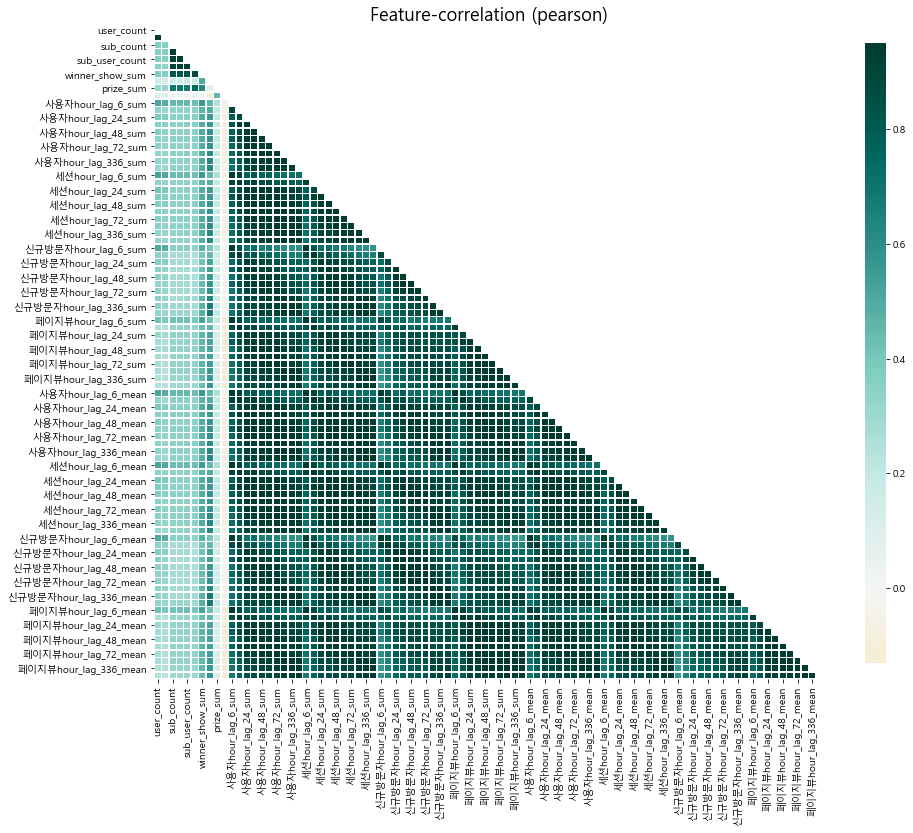

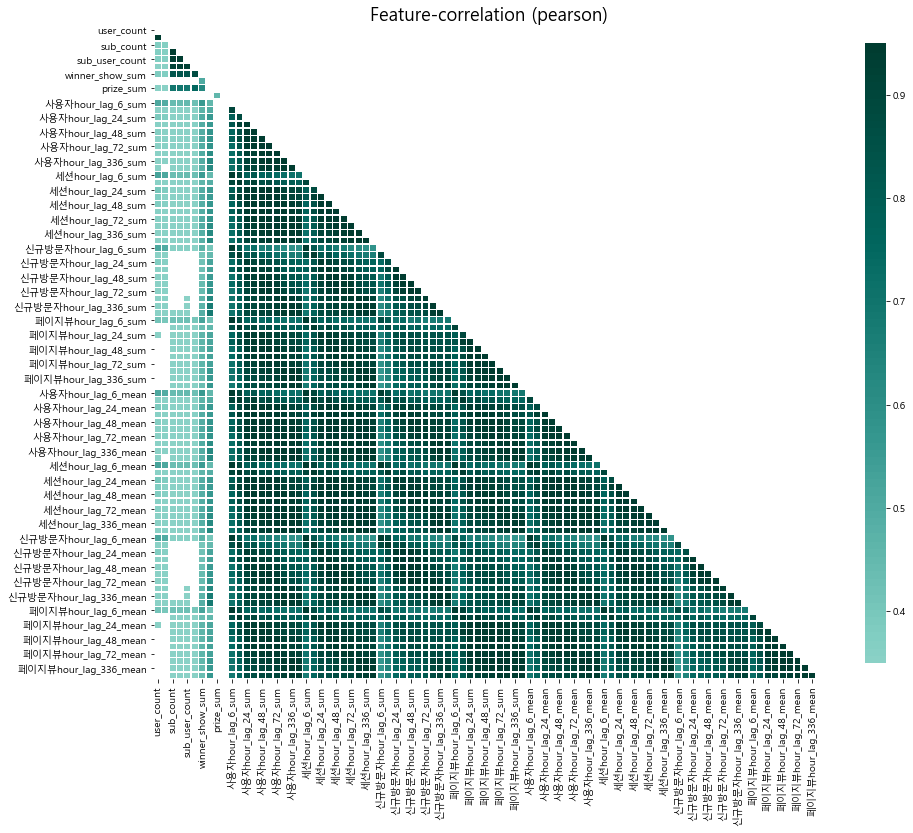

In [39]:
# 속성간 유사성 파악

klib.corr_plot(feature, annot=False, figsize=(15,12))
klib.corr_plot(feature, split='high', annot=False, figsize=(15,12))

In [40]:
corr = feature.corr().apply(lambda x: x.abs())
columns = np.full((corr.shape[0],), True, dtype=bool) #컬럼개수만큼 True 생성
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.95: 
            if columns[j]:
                columns[j] = False #i컬럼과 상관관계가 높은 j컬럼을 False
selected_columns = corr.columns[columns]
feature = feature[selected_columns]

In [41]:
feature

,user_count,sub_count,competition_count,winner_show_sum,winner_show_mean,prize_sum,prize_mean,사용자hour_lag_6_sum,사용자hour_lag_12_sum,사용자hour_lag_24_sum,신규방문자hour_lag_6_sum,신규방문자hour_lag_12_sum,신규방문자hour_lag_24_sum
0,0.0,2.0,2.0,6.0,3.000000,700.0,350.000000,118,215,326,29,54,70
1,0.0,6.0,6.0,18.0,3.000000,2100.0,350.000000,104,219,326,23,56,71
2,0.0,1.0,1.0,3.0,3.000000,350.0,350.000000,95,219,331,21,51,71
3,0.0,1.0,1.0,3.0,3.000000,350.0,350.000000,96,221,331,19,51,69
4,0.0,1.0,1.0,3.0,3.000000,350.0,350.000000,91,219,333,15,48,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18790,10.0,14.0,14.0,138.0,9.857143,3300.0,235.714286,934,1330,2403,200,304,517
18791,16.0,16.0,16.0,111.0,6.937500,10900.0,681.250000,926,1438,2406,187,320,506
18792,14.0,24.0,24.0,165.0,6.875000,19550.0,814.583333,962,1582,2427,188,342,508
18793,12.0,16.0,16.0,144.0,9.000000,6300.0,393.750000,972,1723,2448,186,363,513


In [42]:
# 결측값 파악

klib.missingval_plot(feature)

No missing values found in the dataset.


In [43]:
# 범주형 변수와 수치형 변수를 분리
cat_feature = feature.select_dtypes(include=['object']).columns.to_list()
num_feature = feature.select_dtypes(exclude='object').columns.to_list()

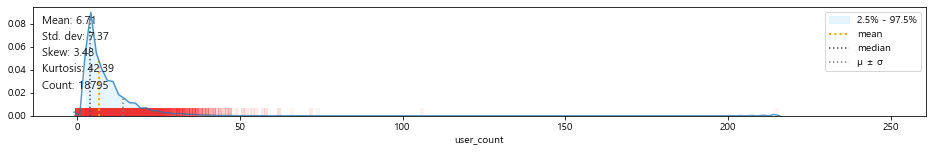

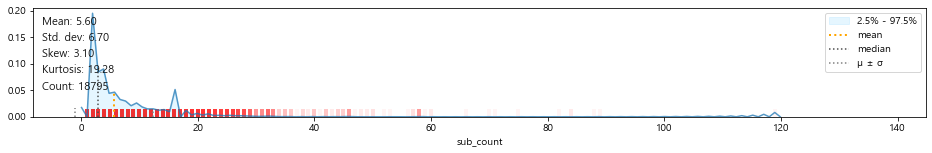

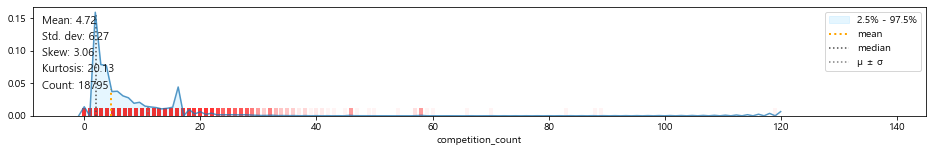

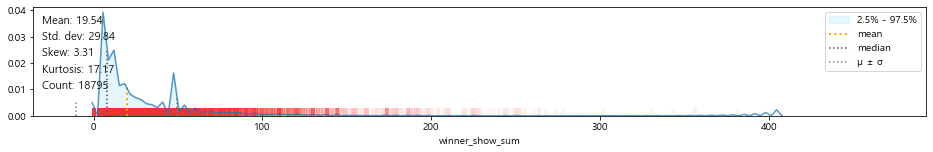

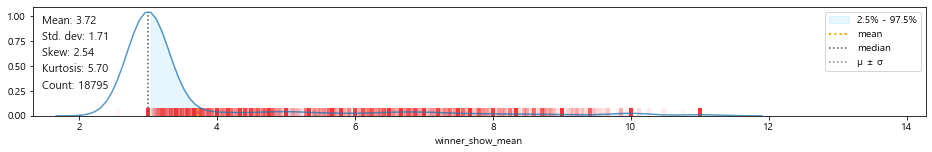

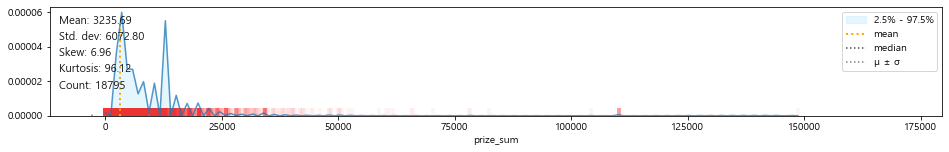

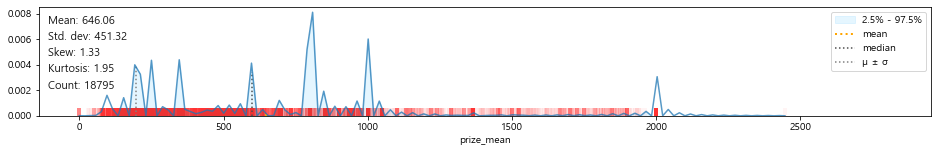

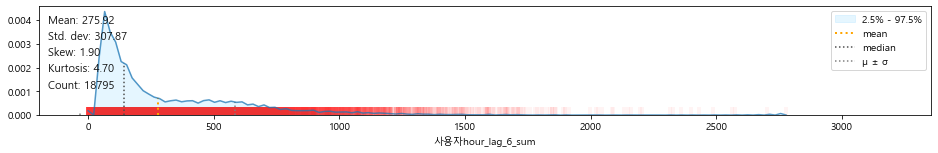

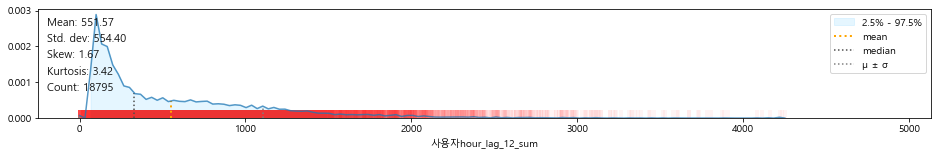

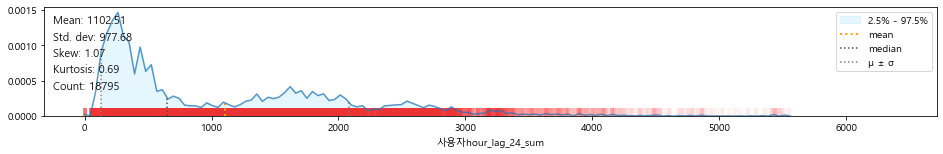

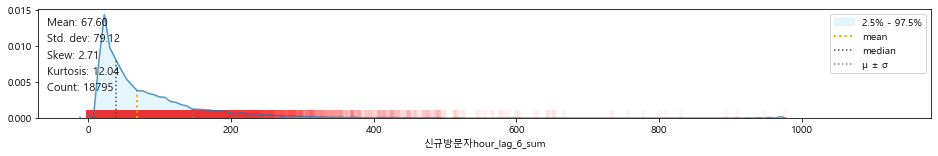

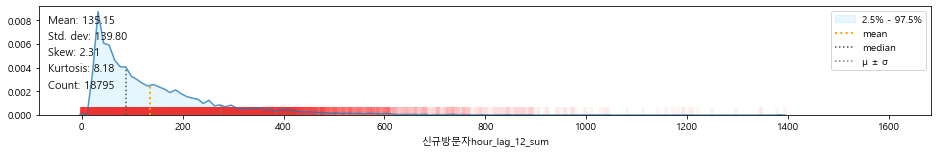

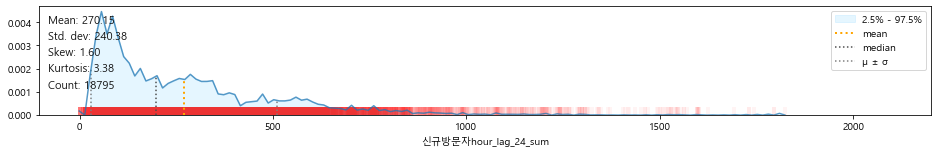

In [44]:
# 수치형 속성 파악

klib.dist_plot(feature)

In [45]:
# 이상치처리
feature[num_feature] = feature[num_feature].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)

In [46]:
# 수치형 변수를 정규분포에 가깝게 만들기
feature[num_feature] = PowerTransformer(standardize=True).fit_transform(feature[num_feature])
feature

,user_count,sub_count,competition_count,winner_show_sum,winner_show_mean,prize_sum,prize_mean,사용자hour_lag_6_sum,사용자hour_lag_12_sum,사용자hour_lag_24_sum,신규방문자hour_lag_6_sum,신규방문자hour_lag_12_sum,신규방문자hour_lag_24_sum
0,-1.417739,-0.464328,-0.149512,-0.193311,-0.508430,-0.196078,-0.565491,-0.227050,-0.427667,-0.788488,-0.270842,-0.480704,-1.038000
1,-1.417739,0.706810,0.776731,0.568007,-0.508430,0.364428,-0.565491,-0.336869,-0.410088,-0.788488,-0.479092,-0.444732,-1.024177
2,-1.417739,-1.208764,-0.634519,-0.604283,-0.508430,-0.482764,-0.565491,-0.415172,-0.410088,-0.773811,-0.559721,-0.536993,-1.024177
3,-1.417739,-1.208764,-0.634519,-0.604283,-0.508430,-0.482764,-0.565491,-0.406130,-0.401413,-0.773811,-0.647671,-0.536993,-1.051994
4,-1.417739,-1.208764,-0.634519,-0.604283,-0.508430,-0.482764,-0.565491,-0.452266,-0.410088,-0.767998,-0.852088,-0.596363,-1.051994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18790,0.944763,1.432820,1.518322,1.709082,2.097200,0.639836,-1.073013,1.628042,1.369835,1.277357,1.593472,1.360814,1.184237
18791,1.431325,1.529508,1.632490,1.709082,2.090302,1.523294,0.366591,1.628042,1.449513,1.278738,1.525145,1.419599,1.157226
18792,1.295672,1.610870,1.632490,1.709082,2.089592,1.661856,0.634264,1.628042,1.547208,1.288364,1.530558,1.496160,1.162175
18793,1.136428,1.529508,1.632490,1.709082,2.097200,1.087532,-0.407867,1.628042,1.611956,1.297912,1.519704,1.565123,1.174474


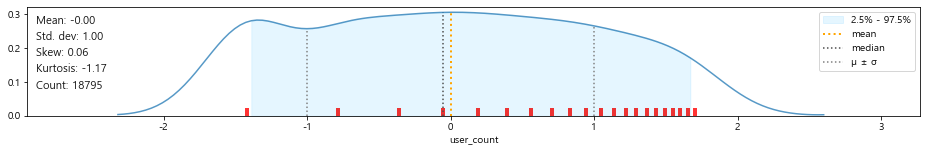

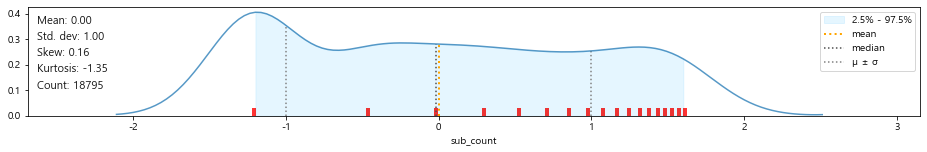

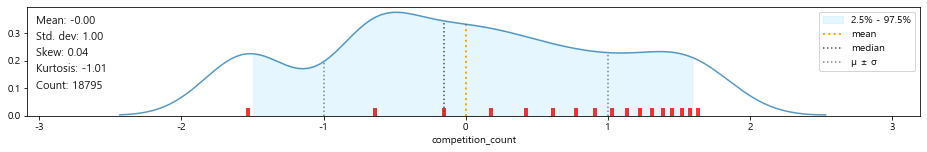

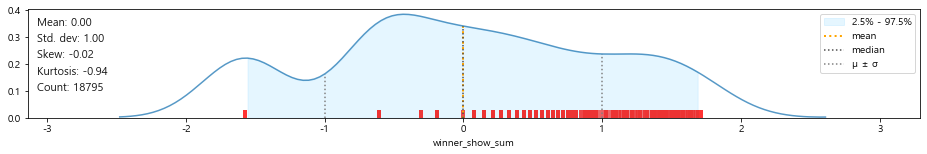

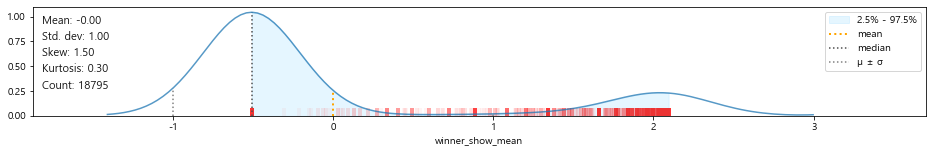

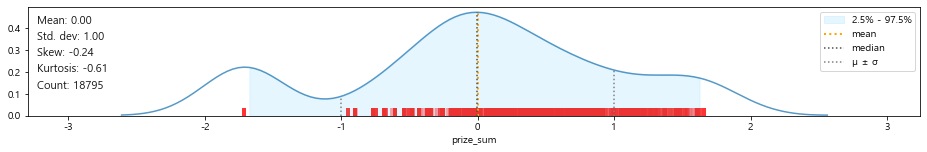

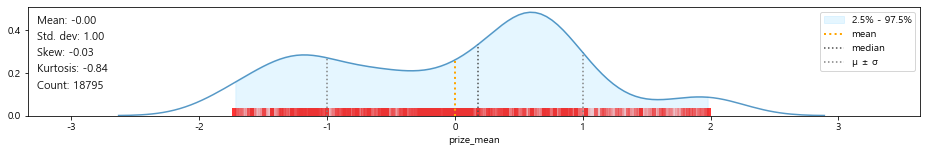

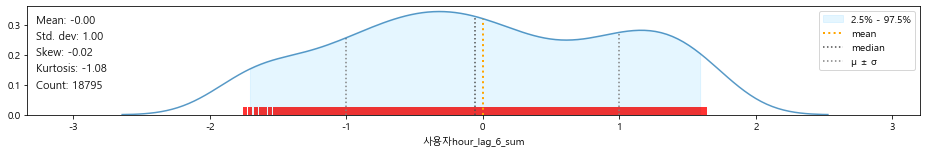

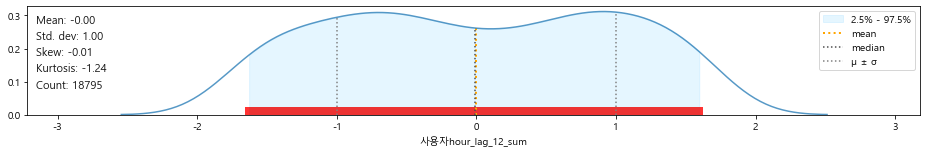

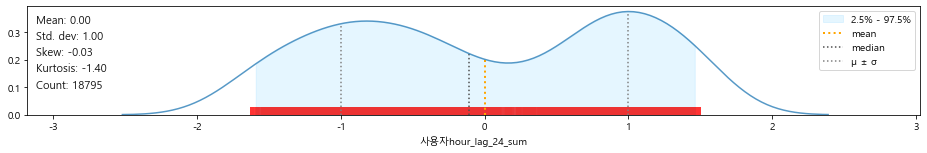

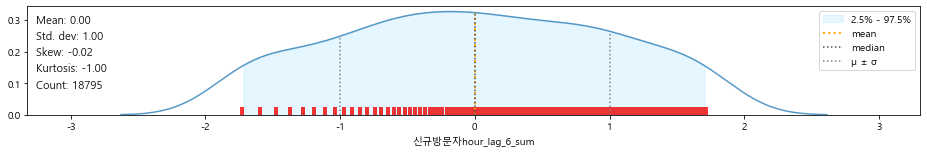

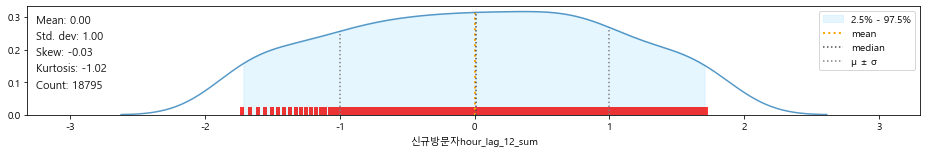

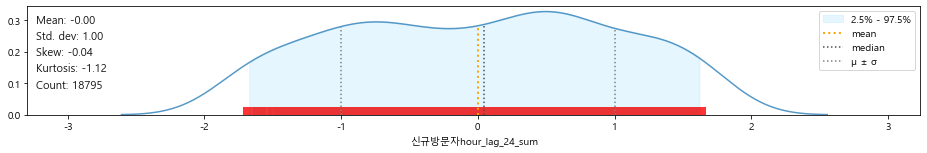

In [47]:
# 수치형 속성 파악

klib.dist_plot(feature)

In [48]:
### 0-1
feature[num_feature] = MinMaxScaler().fit_transform(feature[num_feature])
feature

,user_count,sub_count,competition_count,winner_show_sum,winner_show_mean,prize_sum,prize_mean,사용자hour_lag_6_sum,사용자hour_lag_12_sum,사용자hour_lag_24_sum,신규방문자hour_lag_6_sum,신규방문자hour_lag_12_sum,신규방문자hour_lag_24_sum
0,0.000000,0.264019,0.436945,0.420902,0.000000,0.448763,0.313204,0.449700,0.373402,0.267046,0.423077,0.361503,0.198925
1,0.000000,0.679370,0.729608,0.652651,0.000000,0.615062,0.313204,0.417123,0.378802,0.267046,0.362539,0.371961,0.203035
2,0.000000,0.000000,0.283699,0.295800,0.000000,0.363705,0.313204,0.393895,0.378802,0.271769,0.339100,0.345139,0.203035
3,0.000000,0.000000,0.283699,0.295800,0.000000,0.363705,0.313204,0.396577,0.381467,0.271769,0.313533,0.345139,0.194764
4,0.000000,0.000000,0.283699,0.295800,0.000000,0.363705,0.313204,0.382892,0.378802,0.273640,0.254110,0.327879,0.194764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18790,0.757653,0.936853,0.963926,1.000000,1.000000,0.696773,0.176848,1.000000,0.925617,0.931806,0.965028,0.896862,0.859705
18791,0.913693,0.971144,1.000000,1.000000,0.997353,0.958890,0.563626,1.000000,0.950095,0.932251,0.945165,0.913952,0.851673
18792,0.870189,1.000000,1.000000,1.000000,0.997080,1.000000,0.635541,1.000000,0.980108,0.935348,0.946739,0.936209,0.853145
18793,0.819120,0.971144,1.000000,1.000000,1.000000,0.829602,0.355552,1.000000,1.000000,0.938421,0.943584,0.956258,0.856802


In [49]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import LinearRegression